In [1]:

import matplotlib.pyplot as plt
import mpld3
import numpy as np

from prediksicovidjatim.data.model import ModelDataRepo
from prediksicovidjatim import config, util, database
from prediksicovidjatim.modeling import SeicrdRlcModel, ModelPlotter

import math

database.init()

mpld3.enable_notebook()

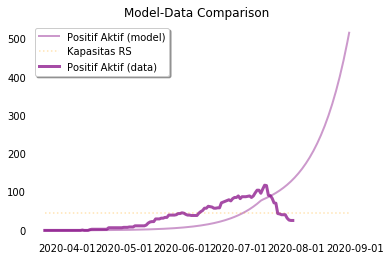

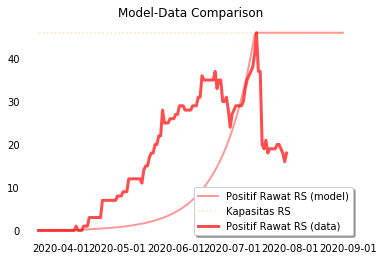

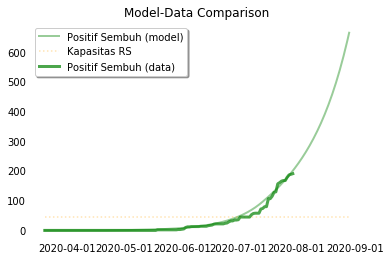

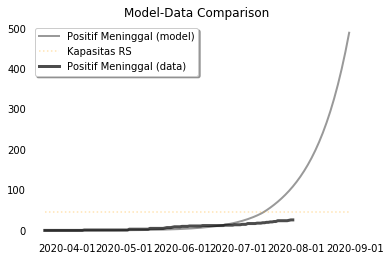

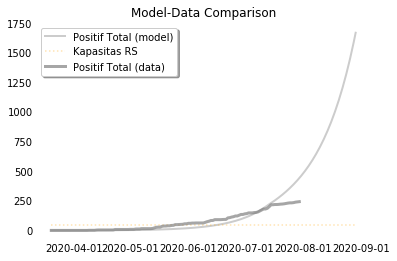

In [2]:
kabko = "KAB. BOJONEGORO"
with database.get_conn() as conn, conn.cursor() as cur:
    kabko_scored = ModelDataRepo.fetch_kabko_scored(cur)

    if kabko not in {x[0] for x in kabko_scored}:
        raise Http404

    kabko = ModelDataRepo.get_kabko_full(kabko, cur)
    fit_scores, test_scores = ModelDataRepo.fetch_scores(kabko.kabko, cur)

mod = SeicrdRlcModel(kabko)
params = kabko.get_params_init(extra_days=config.PREDICT_DAYS)
model_result = mod.model(**params)

plotter = ModelPlotter(kabko, model_result)
datasets = ["infectious_all", "critical_cared", "recovered", "dead", "infected"]
compare = {d:plotter.plot(
    plotter.plot_main_data, 
    [d]
) for d in datasets}

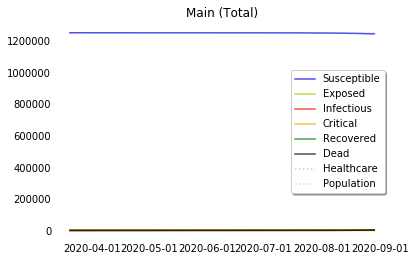

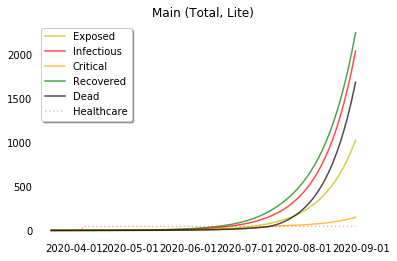

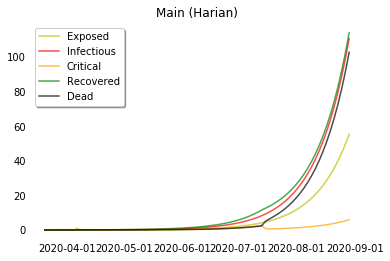

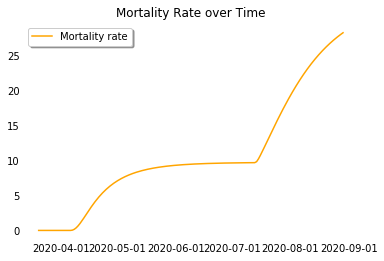

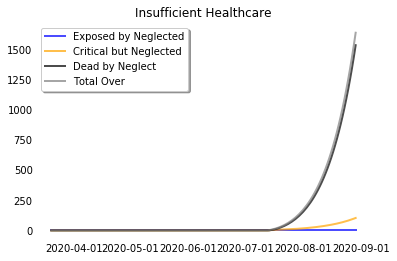

In [3]:

main = {
    "main": mpld3.fig_to_html(plotter.plot(plotter.plot_main)),
    "main_lite": mpld3.fig_to_html(plotter.plot(plotter.plot_main_lite)),
    "daily_lite": mpld3.fig_to_html(plotter.plot(plotter.plot_daily_lite)),
    "mortality_rate": mpld3.fig_to_html(plotter.plot(plotter.plot_mortality_rate)),
    "over": mpld3.fig_to_html(plotter.plot(plotter.plot_over)),
    #"healthcare": plotter.plot(plotter.plot_healthcare)
}